In [43]:
#  Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


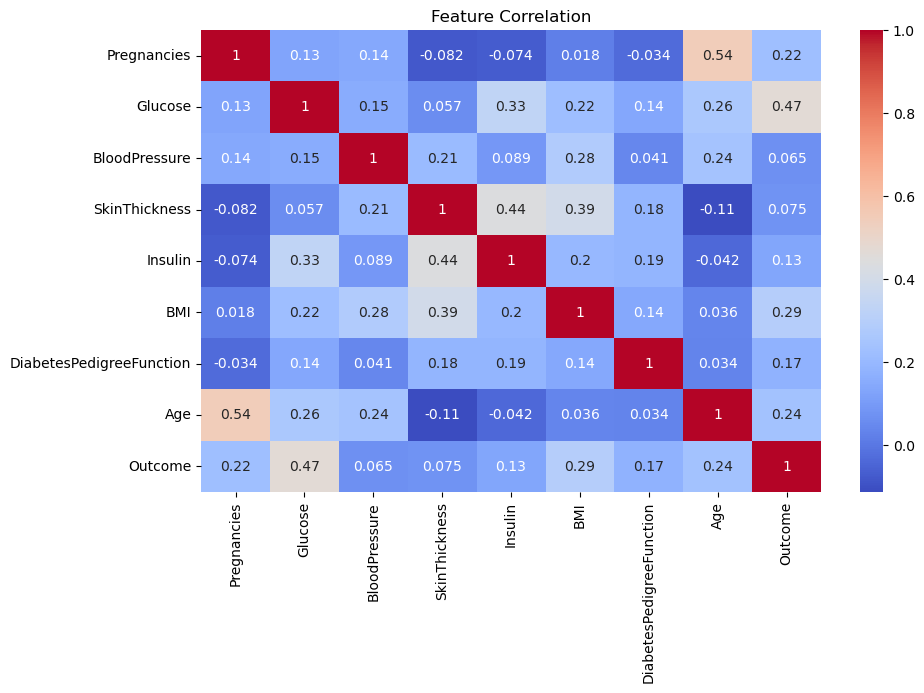

In [45]:
# Check for missing values
df.info()
df.describe()
df.isnull().sum()

# Visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()



#  Feature and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#  Balance the dataset with SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)


In [21]:
#  Load the dataset
df = pd.read_csv('diabetes.csv')
print(df.head())
print(df['Outcome'].value_counts())  # Check class imbalance


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Outcome
0    500
1    268
Name: count, dtype: int64


In [47]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)


In [49]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bal, test_size=0.2, random_state=42)


In [51]:
#  Model training with Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.82
[[75 24]
 [12 89]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        99
           1       0.79      0.88      0.83       101

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



Accuracy Score: 0.82


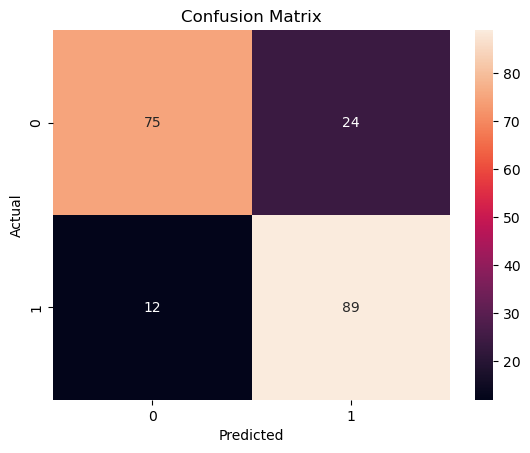

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        99
           1       0.79      0.88      0.83       101

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [53]:
# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))



In [39]:
# Grid Search to tune parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Accuracy: 0.815
